In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('heart_disease.csv')
submission = pd.read_csv('sample.csv')

In [ ]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [ ]:
submission

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
...,...,...
294,910,0
295,911,0
296,912,0
297,916,0


In [ ]:
submission['cluster'].value_counts()

,count
cluster,
0,299


In [ ]:
data['exists'] = data['id'].isin(submission['id'])
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,False
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,False
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,True
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,False
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
data['exists'] = data['id'].isin(submission['id'])
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,False
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,False
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,True
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,False
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
heart_data = data[data['exists'] == True]
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,True
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,True
7,7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,910,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,True
911,911,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,True
912,912,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,True
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
heart_data.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,21
chol,7
fbs,22
restecg,1
thalch,19


In [ ]:
for col in heart_data:
    if heart_data[col].dtype == 'object':
        heart_data[col].fillna('Not known', inplace=True)
    if heart_data[col].dtype == 'int64':
        heart_data[col].fillna(heart_data[col].mode()[0],inplace=True)
    if heart_data[col].dtype == 'float64':
        heart_data[col].fillna(heart_data[col].mean(),inplace=True)

heart_data

<ipython-input-12-cc617b9356f1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data[col].fillna(heart_data[col].mode()[0],inplace=True)
<ipython-input-12-cc617b9356f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data[col].fillna(heart_data[col].mode()[0],inplace=True)
<ipython-input-12-cc617b9356f1>:5: FutureWarning: A value

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,True
3,3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,True
4,4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,True
7,7,57,Female,Cleveland,asymptomatic,120.000000,354.0,False,normal,163.000000,True,0.600000,upsloping,0.000000,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,910,51,Female,VA Long Beach,asymptomatic,114.000000,258.0,True,lv hypertrophy,96.000000,False,1.000000,upsloping,0.716814,Not known,True
911,911,62,Male,VA Long Beach,asymptomatic,160.000000,254.0,True,st-t abnormality,108.000000,True,3.000000,flat,0.716814,Not known,True
912,912,53,Male,VA Long Beach,asymptomatic,144.000000,300.0,True,st-t abnormality,128.000000,True,1.500000,flat,0.716814,Not known,True
916,916,62,Male,VA Long Beach,typical angina,131.539568,139.0,False,st-t abnormality,140.014286,Not known,0.869892,Not known,0.716814,Not known,True


In [ ]:
heart_data.drop(['id', 'exists'], axis=1, inplace=True)
heart_data

<ipython-input-13-166bdebe8031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data.drop(['id', 'exists'], axis=1, inplace=True)


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect
1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal
7,57,Female,Cleveland,asymptomatic,120.000000,354.0,False,normal,163.000000,True,0.600000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,51,Female,VA Long Beach,asymptomatic,114.000000,258.0,True,lv hypertrophy,96.000000,False,1.000000,upsloping,0.716814,Not known
911,62,Male,VA Long Beach,asymptomatic,160.000000,254.0,True,st-t abnormality,108.000000,True,3.000000,flat,0.716814,Not known
912,53,Male,VA Long Beach,asymptomatic,144.000000,300.0,True,st-t abnormality,128.000000,True,1.500000,flat,0.716814,Not known
916,62,Male,VA Long Beach,typical angina,131.539568,139.0,False,st-t abnormality,140.014286,Not known,0.869892,Not known,0.716814,Not known


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   dataset   299 non-null    object 
 3   cp        299 non-null    object 
 4   trestbps  299 non-null    float64
 5   chol      299 non-null    float64
 6   fbs       299 non-null    object 
 7   restecg   299 non-null    object 
 8   thalch    299 non-null    float64
 9   exang     299 non-null    object 
 10  oldpeak   299 non-null    float64
 11  slope     299 non-null    object 
 12  ca        299 non-null    float64
 13  thal      299 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 35.0+ KB


In [ ]:
for col in heart_data:
    print(col, heart_data[col].dtype)

age int64
sex object
dataset object
cp object
trestbps float64
chol float64
fbs object
restecg object
thalch float64
exang object
oldpeak float64
slope object
ca float64
thal object


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for col in heart_data:
    if heart_data[col].dtype == 'object':
        heart_data[col] = heart_data[col].astype(str)
        heart_data[col] = enc.fit_transform(heart_data[col].values.reshape(-1,1))

heart_data

<ipython-input-16-3234b629d970>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data[col] = heart_data[col].astype(str)
<ipython-input-16-3234b629d970>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data[col] = enc.fit_transform(heart_data[col].values.reshape(-1,1))
<ipython-input-16-3234b629d970>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,0.0,3.0,145.000000,233.0,2.0,1.0,150.000000,0.0,2.300000,1.0,0.000000,1.0
1,67,1.0,0.0,0.0,160.000000,286.0,0.0,1.0,108.000000,2.0,1.500000,2.0,3.000000,2.0
3,37,1.0,0.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000,1.0,0.000000,2.0
4,41,0.0,0.0,1.0,130.000000,204.0,0.0,1.0,172.000000,0.0,1.400000,3.0,0.000000,2.0
7,57,0.0,0.0,0.0,120.000000,354.0,0.0,2.0,163.000000,2.0,0.600000,3.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,51,0.0,3.0,0.0,114.000000,258.0,2.0,1.0,96.000000,0.0,1.000000,3.0,0.716814,0.0
911,62,1.0,3.0,0.0,160.000000,254.0,2.0,3.0,108.000000,2.0,3.000000,2.0,0.716814,0.0
912,53,1.0,3.0,0.0,144.000000,300.0,2.0,3.0,128.000000,2.0,1.500000,2.0,0.716814,0.0
916,62,1.0,3.0,3.0,131.539568,139.0,0.0,3.0,140.014286,1.0,0.869892,0.0,0.716814,0.0


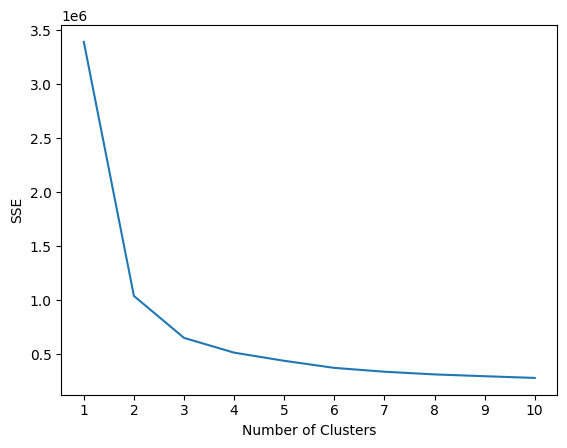

In [ ]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 42,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(heart_data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=42)

#fit k-means algorithm to data
kmeans.fit(heart_data)

#view cluster assignments for each observation
predictions = kmeans.labels_
predictions

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtyp

(3, 14)


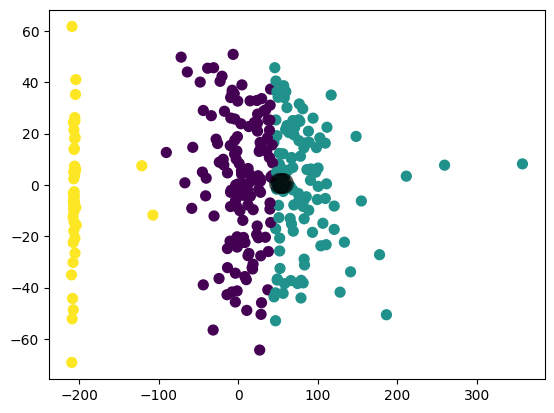

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

pca_data = pca.fit_transform(heart_data)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
submission['cluster'] = predictions
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,id,cluster
0,0,0
1,1,1
2,3,1
3,4,0
4,7,1
...,...,...
294,910,1
295,911,1
296,912,1
297,916,0
